# 卡方分布
卡方分布，也称皮尔逊-卡方分布，卡方分布是伽马分布的一个特例。它是一个参数为df（自由度）的分布。它是一个右偏分布，k较小时，分布的偏态严重。当k趋于无穷大时，卡方分布趋于正态分布。它基于平方和，因此它的值都是正数。

<img src="resource/chi-square-distribution.png" width=30%></img>

<Axes: ylabel='Density'>

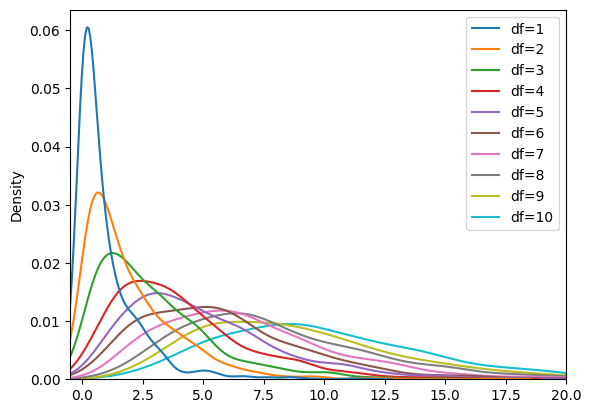

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

multi = {}
for idx in range(10):
    multi[f'df={idx+1}'] = np.random.chisquare(idx+1, 1000)
plt.xlim(-0.5, 20)
sns.kdeplot(data=multi)

# 卡方检验
对Categroical变量进行假设检验时，通常使用卡方检验。卡方检验是基于卡方分布的性质而设计的。在原假设成立的条件下，卡方统计量(chi2_statistic)符合卡方分布。

卡方检验有三种不同的类型，独立检验、等比例检验和拟合度检验。

前两种检验使用相同的计算方式和自由度（基于RXC列联表/Contingency Table）。独立性检验中，如果超过2个变量，则是一个multi-dimensional contingency table。等比例检验中，永远是一个二维的RC表，超过2个总体，增加行数。**独立检验2个变量**和**等比例检验2个总体**，从RC表的表现形式一模一样，区别在于检验的内容不同：一个是检验两个变量的独立性，一个是检验两个不同总体的变量分布的一致性。

第三种用另外的计算方式，主要区别是自由度。对应的scipy.stats中的函数为：scipy.stats.chi2_contingency和scipy.stats.chisquare。

| 名称 | 适用场景 | 检验类型 | 计算 | dof |
| -- | -- | -- | -- | -- |
| 卡方独立检验(**independence**) | 从1个总体抽样，得到2+个Categorical变量 | 变量是否独立 | chi2_contingency | (d1-1)\*(d2-1)\*...(dn-1) |
| 卡方等比例检验(**equality of proportions**) | 从2+个总体中进行抽样，得到1个Categorical变量 | 多个总体中，变量的分布是否一致 | chi2_contingency | (r-1)*(c-1) |
| 卡方拟合度检验(**goodness of fit**) | 从1个总体抽样，得到1个Categorical变量，符合一个假设（期望）的分布 | 变量的分布是否与假设的分布一致 | chisquare | c-1 |

以AB实验为例：
- 角度1：不同实验组可以看作不同总体，不同总体抽样后，总能得到1个相同的Categorical变量，即：是否点击广告。需要观察不同实验组，是否点击广告的分布是否一致。此时，应用“**卡方等比例检验**”。特殊情况是：不同的实验组只有两组，即基准组和实验组，我们即可以建模成当前角度，也可以用下面的角度阐述。
- 角度2：我们认为基准组是否点击广告服从一个假设的（或者期望的）分布。我们从实验组中获得是否点击广告的分类变量。观察实验组点击广告的分布是否与假设分布一致。此时，应用“**卡方拟合度检验**”。

# 卡方检验——独立性检验/等比例检验

| 名称 | name | 适用场景 | 检验类型 |
| -- | -- | -- | -- |
| 独立检验 | chi2 test of independence | 从1个总体抽样，得到2+个Categorical变量 | 变量是否独立 |
| 等比例检验 | chi2 test of equality of proportions | 从2+个总体中进行抽样，得到1个Categorical变量 | 变量的分布是不是一样的 |

- N<sub>0</sub>: A变量(纵向) x B变量(横向) 是独立的
- N<sub>a</sub>: A变量(纵向) x B变量(横向) 不是独立的

| | 患癌症 | 不患癌症 | 
| -- | -- | -- | 
| 吸烟 | 316 | 50657 |
| 不吸烟  | 246 | 50096 |

- N<sub>0</sub>: 吸烟 x 患癌症 是独立的
- N<sub>a</sub>: 吸烟 x 患癌症 不是独立的

| | click | not_click | 
| -- | -- | -- | 
| base | 316 | 50657 |
| exp  | 246 | 50096 |

- N<sub>0</sub>: 2个总体（基准组和实验组）是否点击广告的分布是一样的
- N<sub>a</sub>: 2个总体（基准组和实验组）是否点击广告的分布是不一样的
------

| | click | not_click | x_sum |
| -- | -- | -- | -- |
| base | 316 | 50657 | 50973 |
| exp  | 246 | 50096 | 50342 |
| y_sum  | 562 | 100753 | 101315 |

------

| yy_sum | click | not_click | 
| -- | -- | -- | 
| base | 562 | 100753 | 
| exp  | 562 | 100753 |

------

| xx_sum | click | not_click | 
| -- | -- | -- | 
| base | 50973 | 50973 | 
| exp  | 50342 | 50342 |

------
- exp_table = yy_sum * xx_sum / total
- chi2_statistic = sum[(rc_table - exp_table)^2 / exp_table]
- dof = (r-1) * (c-1) = rc - (r+c) + 1 = rc_table.size - sum(rc_table.shape) + 1
- chi2_pvalue = 1 - chi2.cdf(chi2_statistic, dof)

In [2]:
# Chi-square test of independence of variables in a contingency table
import numpy as np
from scipy.stats import chi2_contingency, chi2
rc_table = table = np.array([[316,50657],[246,50096]])

# version1: scipy.stats.chi2_contingency: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#rf346382074c5-3
test = chi2_contingency(rc_table, correction=False)
chi2_statistic = test[0]
chi2_pvalue = test[1]

# version2: raw
y_sum = np.sum(rc_table,axis=0) # [316+246, 50657+50096] => [562, 100753]
x_sum = np.sum(rc_table,axis=1) # [316+50657, 246+50096] => [50973, 50342]
total = np.sum(rc_table)        # 101315

yy_sum = np.repeat( np.expand_dims(y_sum, axis=0), 2, axis=0 )
xx_sum = np.repeat( np.expand_dims(x_sum, axis=1), 2, axis=1 )
exp_table = yy_sum * xx_sum / total
diff_table = rc_table - exp_table

chi2_statistic_1 = np.sum((diff_table * diff_table) / exp_table)
chi2_dof = rc_table.size - sum(rc_table.shape) + 1
chi2_pvalue_1 = 1 - chi2.cdf(chi2_statistic_1, chi2_dof)
chi2_pvalue_2 = chi2.sf(chi2_statistic_1, chi2_dof)

chi2_statistic, chi2_pvalue, chi2_statistic_1, chi2_pvalue_1, chi2_pvalue_2

(7.912925368884094,
 0.0049082834917938654,
 7.912925368884094,
 0.004908283491793841,
 0.0049082834917938654)

# 卡方检验-拟合度

| 名称 | name | 适用场景 | 检验类型 |
| -- | -- | -- | -- |
| 拟合度检验 | chi2 test of goodness of fit | 从1个总体抽样，得到1个Categorical变量，符合一个假设（期望）的分布 | 变量的分布是否与假设的分布一致 |

- N<sub>0</sub>: 观察频度 与 期望频度 的分布一致
- N<sub>a</sub>: 观察频度 与 期望频度 的分布不一致
- dof: c - 1

| | click | not_click | 
| -- | -- | -- | 
| freq_expected_raw(control group) | 316 | 50657 |
| freq_observation(expriment group)  | 246 | 50096 |

- N<sub>0</sub>: 实验组是否点击广告 与 base组是否点击广告 的分布一致
- N<sub>a</sub>: 实验组是否点击广告 与 base组是否点击广告 的分布不一致
- 要先对freq_expected_raw进行处理（freq_expected_ratio * freq_observation_total），使期望的总频度与观察的总频度相等

-------

| | click | not_click | 
| -- | -- | -- | 
| ratio_expected(control) 期望比例 | 316/(316+50657) | 50657/(316+50657) |
| freq_expected(control) 期望频度 | 316/(316+50657) * (246+50096) | 50657/(316+50657) * (246+50096) |
| freq_observation(expriment)  观察频度 | 246 | 50096 |

-------
more generalized version, the categorical number is more than 2

| | 一等奖 | 二等奖 | 三等奖 | 四等奖 | 五等奖 | total |
| -- | -- | -- | -- | -- | -- | -- |
| r_exp | 5% | 10% | 20% | 30% | 35% | 1 |
| f_exp | 10 | 20 | 40 | 60 | 70 | 200(=observation_total) |
| f_obs | 0 | 30 | 46 | 58 | 66 | 200 |

In [188]:
from scipy.stats import chisquare, chi2
import numpy as np

rc_table = np.array([[316,50657],[246,50096]])
y_sum = np.sum(rc_table, axis=1)

# 计算f_obs（观察频度）, f_exp（期望频度）
f_obs = rc_table[1]
f_exp = rc_table[0] / y_sum[0] * y_sum[1]

# version1: scipy.stats.chisquare
test = chisquare(f_obs=f_obs, f_exp=f_exp)
chi2_statistic, chi2_pvalue = test.statistic, test.pvalue

# version2: raw
diff = f_obs - f_exp
chi2_statistic_1 = sum(diff * diff / f_exp)
chi2_pvalue_1 = 1 - chi2.cdf(chi2_statistic_1, rc_table.shape[1]-1)

chi2_statistic, chi2_pvalue, chi2_statistic_1, chi2_pvalue_1

(14.082224656822136,
 0.0001749897104594564,
 14.082224656822136,
 0.0001749897104594833)

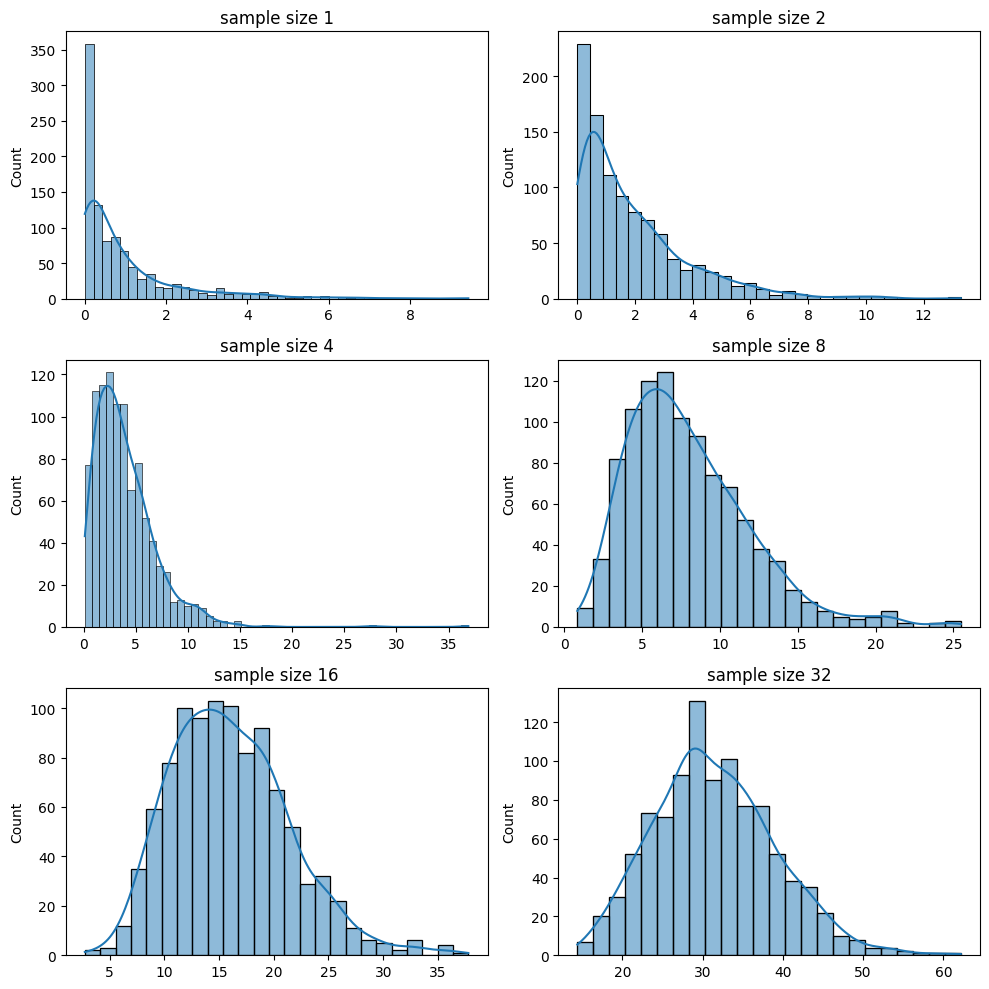

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2,figsize=(10, 10))
for idx, ax in enumerate(axes.flatten()):
    ax.set_title(f"sample size {np.power(2, idx)}")
    sns.histplot(np.random.chisquare(df = np.power(2, idx), size = 1000), ax=ax, kde=True)

fig.tight_layout()
plt.show()

# 随机变量抽样
- np.random._DistributionA_(params, size) (much faster)
- scipy.stats._DistributionB_.rvs(params, size)

| numpy distribution | scipy distribution | params |
| -- | -- | -- |
| normal | norm | loc, scale |
| chisquare | chi2 | df |
| binomial | binom | n, p |
| beta | beta | a, b |


<Axes: ylabel='Count'>

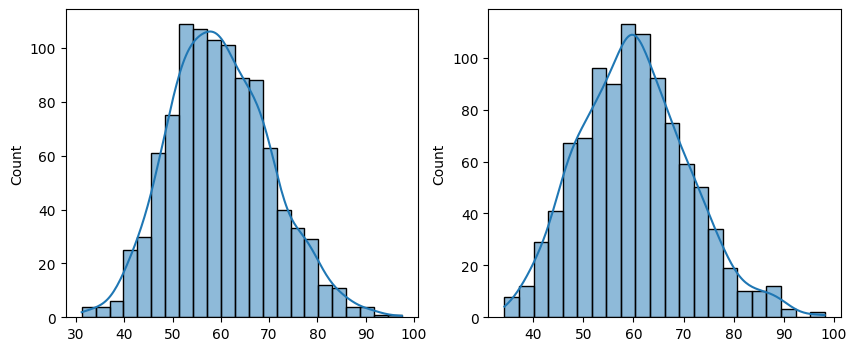

In [24]:
from scipy import stats
np_rvs = np.random.chisquare(df=60, size = 1000)
scipy_rvs = stats.chi2.rvs(df=60, size = 1000)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(np_rvs, ax = ax[0], kde=True)
sns.histplot(scipy_rvs, ax = ax[1], kde=True)